In [1]:
import os
import csv
import pandas as pd
from statistics import median, mean
import numpy as np
import scipy.stats as st
from sentiment import calc_accuracy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import Image

# Reading Data
Reads the output files of bootstrap.py and saves it to a dictionary `data`.

### Sentiment Analysis Task

In [2]:
data = {
    "Pipeline 1": {},
    "Pipeline 2": {},
    "Pipeline 3": {},
}

dir_name = "BootstrappedSentiment"

# Go through each pipeline
for pline in sorted(os.listdir(dir_name)):
    if pline == "Twitter Dataset":
        pipeline = "Pipeline 1"
    elif pline == "TranslatedToEnglishTweets":
        pipeline = "Pipeline 2"
    else:
        pipeline = "Pipeline 3"
        
    pipeline_dir_name = dir_name + "/" + pline
    
    # Go through each subset (with and without neutrals)
    for subset in sorted(os.listdir(pipeline_dir_name)):  # subset is AllTweets or NoNeuTweets
        data[pipeline][subset] = {}
        
        subset_dir_name = pipeline_dir_name + "/" + subset
        
        # Go through each language
        for lang_file in sorted(os.listdir(subset_dir_name)):    
            # Open the file and convert the data to a list
            with open(subset_dir_name + "/" + lang_file) as lang:
                reader = csv.reader(lang)
                vals = next(reader)

            accuracies = [float(x) for x in vals]

            median_ = median(accuracies)
            mean_ = mean(accuracies)
            conf99 = st.t.interval(0.99, len(accuracies)-1, loc=np.median(accuracies), scale=st.sem(accuracies))
            
            if lang_file == "Combined.csv":
                print(min(accuracies), median(accuracies), max(accuracies))

            stats = { 
                "Median": median_,
                "Mean": mean_,
                "99 Confidence": conf99,
                "99 Distance": abs(median_ - conf99[0])  # Error distance
            }

            cur_lang = lang_file.split(".")[0]
            data[pipeline][subset][cur_lang] = stats

0.3695134591433292 0.37069205714110576 0.37207475041863913
0.6174642781849133 0.6195824694914704 0.6226609334295847
0.39775658976785344 0.39919562179131 0.4006501909214466
0.6741087036422803 0.6773197763343846 0.6806583918939537
0.4011081067746282 0.4022588811498849 0.40344370621619685
0.6263540543361046 0.6292841870731398 0.6317081212616562


### Topic Clustering Task

In [3]:
cluster_data = {}

dir_name = "BootstrappedCluster"

for lang_file in sorted(os.listdir(dir_name)):
    with open(dir_name + "/" + lang_file) as lang:
            reader = csv.reader(lang)
            vals = next(reader)

            accuracies = [float(x) for x in vals]
            
            median_ = median(accuracies)
            mean_ = mean(accuracies)
            conf99 = st.t.interval(0.99, len(accuracies)-1, loc=np.median(accuracies), scale=st.sem(accuracies))
            
            stats = { 
                "Median": median_,
                "Mean": mean_,
                "99 Confidence": conf99,
                "99 Distance": abs(median_ - conf99[0])  # Error distance
            }
            
            cur_lang = lang_file.split(".")[0]
            cluster_data[cur_lang] = stats

# Figure Generation

### Figure 1

Comparison of Pipeline 1: Cleaned Original Language and Pipeline 2: Translated to English accuracies accross all languages.

In [4]:
# Distance between median and bounds of 95% confidence interval
def lower_dist(i):
    return abs(fig_data["Confidence"][i][0] - fig_data["MedianAccuracy"][i])

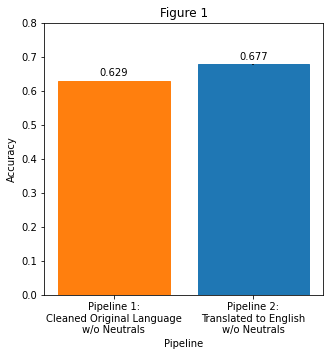

In [5]:
pl1_data = data["Pipeline 1"]["NoNeuTweets"]["Combined"]
pl2_data = data["Pipeline 2"]["NoNeuTweets"]["Combined"]
fig_data = pd.DataFrame({"Pipeline": ["Pipeline 1:\nCleaned Original Language\nw/o Neutrals", "Pipeline 2:\nTranslated to English\nw/o Neutrals"], 
                     "Median": [pl1_data["Median"], pl2_data["Median"]],
                     "99 Distance": [pl1_data["99 Distance"], pl2_data["99 Distance"]]})

plt.rcParams["figure.figsize"] = (5,5)

bp = sns.barplot(
    data=fig_data,
    x="Pipeline",
    y="Median",
    yerr=fig_data["99 Distance"])

plt.ylim(0, 0.8)
bp.set_title("Figure 1")
bp.set(xlabel="Pipeline", ylabel="Accuracy")

bp.patches[0].set_color("tab:orange")
bp.patches[1].set_color("tab:blue")

for bar in bp.patches:
    bp.annotate(format(bar.get_height(), '.3f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
                size=10, xytext=(0, 8),
                textcoords='offset points')

plt.savefig("Figures/figure1.png", bbox_inches="tight")

### Figure 2

Comparison of Pipeline 1: Cleaned Original Language and Pipeline 3: Translated Back to Original Language accuracies accross all languages.

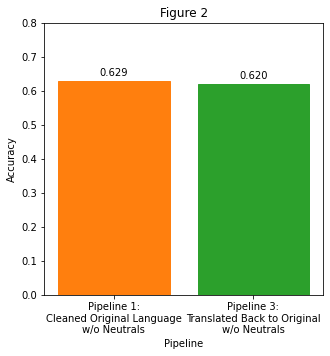

In [6]:
pl1_data = data["Pipeline 1"]["NoNeuTweets"]["Combined"]
pl3_data = data["Pipeline 3"]["NoNeuTweets"]["Combined"]
fig_data = pd.DataFrame({"Pipeline": ["Pipeline 1:\nCleaned Original Language\nw/o Neutrals", "Pipeline 3:\nTranslated Back to Original\nw/o Neutrals"], 
                     "Median": [pl1_data["Median"], pl3_data["Median"]],
                     "99 Distance": [pl1_data["99 Distance"], pl3_data["99 Distance"]]})

plt.rcParams["figure.figsize"] = (5,5)

bp = sns.barplot(
    data=fig_data,
    x="Pipeline",
    y="Median",
    yerr=fig_data["99 Distance"])

plt.ylim(0, 0.8)
bp.set_title("Figure 2")
bp.set(xlabel="Pipeline", ylabel="Accuracy")

bp.patches[0].set_color("tab:orange")
bp.patches[1].set_color("tab:green")

for bar in bp.patches:
    bp.annotate(format(bar.get_height(), '.3f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
                size=10, xytext=(0, 8),
                textcoords='offset points')

plt.savefig("Figures/figure2.png", bbox_inches="tight")

### Figure 3

In [7]:
pipelines = ["Pipeline 2:\nTranslated to English\nw/o Neutrals", "Pipeline 1:\nCleaned Original Language\nw/o Neutrals", "Pipeline 3:\nTranslated Back to Original\nw/o Neutrals"]

In [8]:
def build_fig3_data():
    fig_data = { "Albanian" :   {},
                 "Bosnian" :    {},
                 "Bulgarian" :  {},
                 "Croatian" :   {},
                 "German" :     {},
                 "Hungarian" :  {},
                 "Polish" :     {},
                 "Portuguese" : {},
                 "Russian" :    {},
                 "Serbian" :    {},
                 "Slovak" :     {},
                 "Slovenian" :  {},
                 "Spanish" :    {},
                 "Swedish" :    {}  }


    for lang in fig_data:
        fig_data[lang]["Medians"] = [data["Pipeline 2"]["NoNeuTweets"][lang]["Median"],
                                     data["Pipeline 1"]["NoNeuTweets"][lang]["Median"],
                                     data["Pipeline 3"]["NoNeuTweets"][lang]["Median"]]
        fig_data[lang]["99 Distances"] = [data["Pipeline 2"]["NoNeuTweets"][lang]["99 Distance"],
                                          data["Pipeline 1"]["NoNeuTweets"][lang]["99 Distance"],
                                          data["Pipeline 3"]["NoNeuTweets"][lang]["99 Distance"]]

    fig_data["English"] = {
        "Medians": [0, data["Pipeline 1"]["NoNeuTweets"][lang]["Median"], 0],
        "99 Distances": [0, data["Pipeline 1"]["NoNeuTweets"][lang]["99 Distance"], 0]
    }
    
    return fig_data

In [9]:
def create_barchart(lang) -> None:
    bp = sns.barplot(x=pipelines, 
                     y=fig_data[lang]["Medians"],
                     yerr=fig_data[lang]["99 Distances"])

    for bar in bp.patches:
        bp.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                        size=10, xytext=(0, 8),
                        textcoords='offset points')
    
    plt.rcParams["figure.figsize"] = (3,3)
    
    bp.patches[0].set_color("tab:blue")
    bp.patches[1].set_color("tab:orange")
    bp.patches[2].set_color("tab:green")
    
    # Hide x axis labels
    bp.set(xticklabels=[])
    
    plt.ylim(0, 0.9)
    plt.ylabel("Accuracy")
    plt.title(lang)

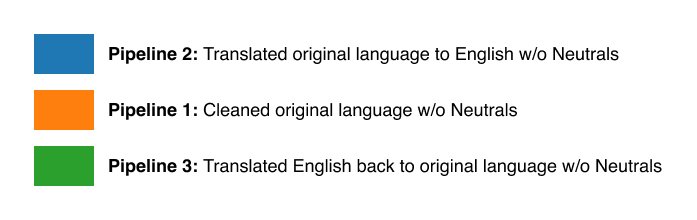

In [10]:
Image(filename="Figures/figure3-legend.png") 

In [11]:
fig_data = build_fig3_data()

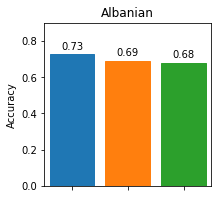

In [12]:
plt.rcParams["figure.figsize"] = (3,3)
create_barchart("Albanian")
plt.savefig("Figures/figure3-1.png", bbox_inches="tight")

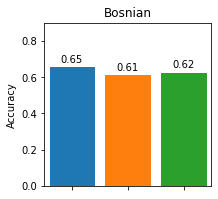

In [13]:
create_barchart("Bosnian")
plt.savefig("Figures/figure3-2.png", bbox_inches="tight")

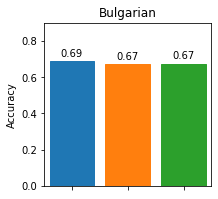

In [14]:
create_barchart("Bulgarian")
plt.savefig("Figures/figure3-3.png", bbox_inches="tight")

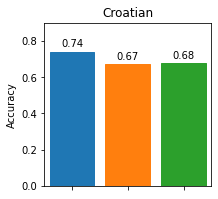

In [15]:
create_barchart("Croatian")
plt.savefig("Figures/figure3-4.png", bbox_inches="tight")

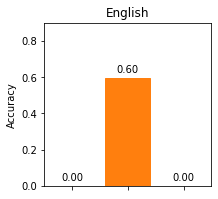

In [16]:
create_barchart("English")
plt.savefig("Figures/figure3-5.png", bbox_inches="tight")

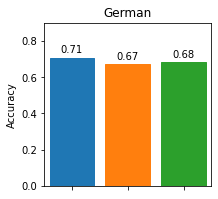

In [17]:
create_barchart("German")
plt.savefig("Figures/figure3-6.png", bbox_inches="tight")

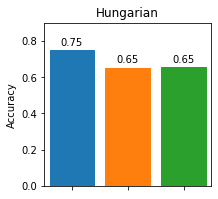

In [18]:
create_barchart("Hungarian")
plt.savefig("Figures/figure3-7.png", bbox_inches="tight")

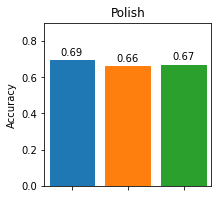

In [19]:
create_barchart("Polish")
plt.savefig("Figures/figure3-8.png", bbox_inches="tight")

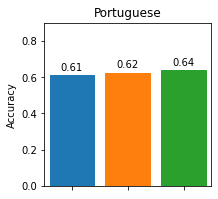

In [20]:
create_barchart("Portuguese")
plt.savefig("Figures/figure3-9.png", bbox_inches="tight")

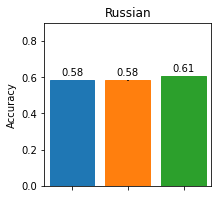

In [21]:
create_barchart("Russian")
plt.savefig("Figures/figure3-10.png", bbox_inches="tight")

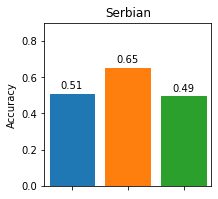

In [22]:
create_barchart("Serbian")
plt.savefig("Figures/figure3-11.png", bbox_inches="tight")

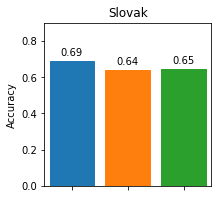

In [23]:
create_barchart("Slovak")
plt.savefig("Figures/figure3-12.png", bbox_inches="tight")

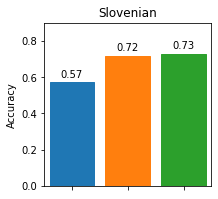

In [24]:
create_barchart("Slovenian")
plt.savefig("Figures/figure3-13.png", bbox_inches="tight")

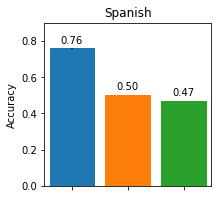

In [25]:
create_barchart("Spanish")
plt.savefig("Figures/figure3-14.png", bbox_inches="tight")

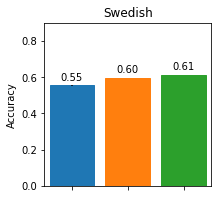

In [26]:
create_barchart("Swedish")
plt.savefig("Figures/figure3-15.png", bbox_inches="tight")

### Figure 4

These figures use the full dataset, *with* neutrals.

In [27]:
pipelines = ["Pipeline 2:\nTranslated to English", "Pipeline 1:\nCleaned Original Language", "Pipeline 3:\nTranslated Back to Original"]

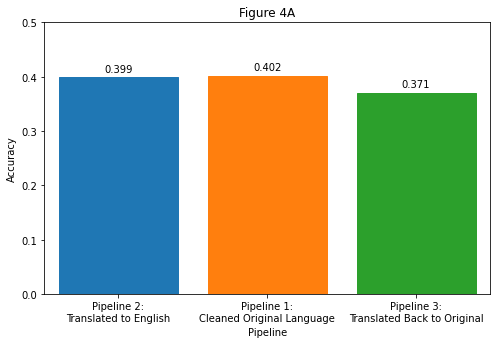

In [28]:
pl1_data = data["Pipeline 1"]["AllTweets"]["Combined"]
pl2_data = data["Pipeline 2"]["AllTweets"]["Combined"]
pl3_data = data["Pipeline 3"]["AllTweets"]["Combined"]
fig_data = pd.DataFrame({"Pipeline": pipelines, 
                     "Median": [pl2_data["Median"], pl1_data["Median"], pl3_data["Median"]],
                     "99 Distance": [pl2_data["99 Distance"], pl1_data["99 Distance"], pl3_data["99 Distance"]]})

plt.rcParams["figure.figsize"] = (8,5)

bp = sns.barplot(
    data=fig_data,
    x="Pipeline",
    y="Median",
    yerr=fig_data["99 Distance"])

plt.ylim(0, 0.5)
bp.set_title("Figure 4A")
bp.set(xlabel="Pipeline", ylabel="Accuracy")

bp.patches[0].set_color("tab:blue")
bp.patches[1].set_color("tab:orange")
bp.patches[2].set_color("tab:green")

for bar in bp.patches:
    bp.annotate(format(bar.get_height(), '.3f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
                size=10, xytext=(0, 8),
                textcoords='offset points')

plt.savefig("Figures/figure4.png", bbox_inches="tight")

In [29]:
fig_data = { "Albanian" :   {},
             "Bosnian" :    {},
             "Bulgarian" :  {},
             "Croatian" :   {},
             "German" :     {},
             "Hungarian" :  {},
             "Polish" :     {},
             "Portuguese" : {},
             "Russian" :    {},
             "Serbian" :    {},
             "Slovak" :     {},
             "Slovenian" :  {},
             "Spanish" :    {},
             "Swedish" :    {}  }


for lang in fig_data:
    fig_data[lang]["Medians"] = [data["Pipeline 2"]["AllTweets"][lang]["Median"],
                                 data["Pipeline 1"]["AllTweets"][lang]["Median"],
                                 data["Pipeline 3"]["AllTweets"][lang]["Median"]]
    fig_data[lang]["99 Distances"] = [data["Pipeline 2"]["AllTweets"][lang]["99 Distance"],
                                      data["Pipeline 1"]["AllTweets"][lang]["99 Distance"],
                                      data["Pipeline 3"]["AllTweets"][lang]["99 Distance"]]
    
fig_data["English"] = {
    "Medians": [0, data["Pipeline 1"]["AllTweets"][lang]["Median"], 0],
    "99 Distances": [0, data["Pipeline 1"]["AllTweets"][lang]["99 Distance"], 0]
}

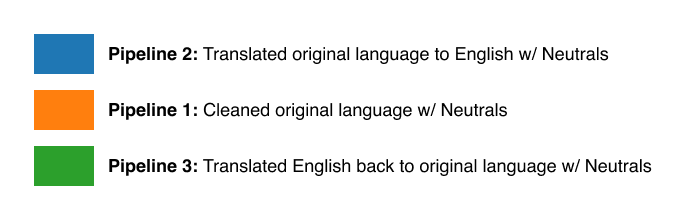

In [30]:
Image(filename="Figures/figure4-legend.png") 

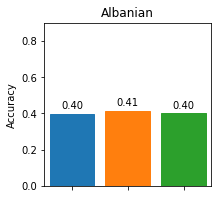

In [31]:
plt.rcParams["figure.figsize"] = (3,3)
create_barchart("Albanian")
plt.savefig("Figures/figure4-1.png", bbox_inches="tight")

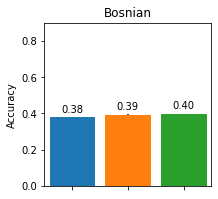

In [32]:
create_barchart("Bosnian")
plt.savefig("Figures/figure4-2.png", bbox_inches="tight")

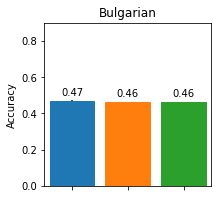

In [33]:
create_barchart("Bulgarian")
plt.savefig("Figures/figure4-3.png", bbox_inches="tight")

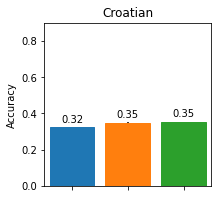

In [34]:
create_barchart("Croatian")
plt.savefig("Figures/figure4-4.png", bbox_inches="tight")

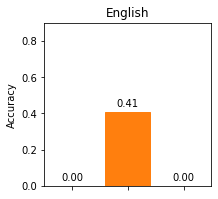

In [35]:
create_barchart("English")
plt.savefig("Figures/figure4-5.png", bbox_inches="tight")

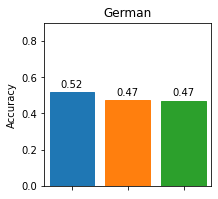

In [36]:
create_barchart("German")
plt.savefig("Figures/figure4-6.png", bbox_inches="tight")

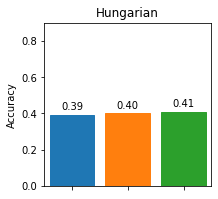

In [37]:
create_barchart("Hungarian")
plt.savefig("Figures/figure4-7.png", bbox_inches="tight")

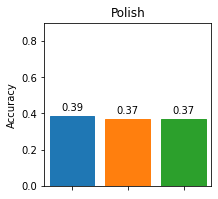

In [38]:
create_barchart("Polish")
plt.savefig("Figures/figure4-8.png", bbox_inches="tight")

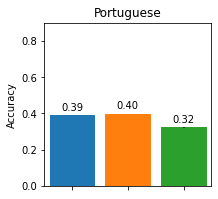

In [39]:
create_barchart("Portuguese")
plt.savefig("Figures/figure4-9.png", bbox_inches="tight")

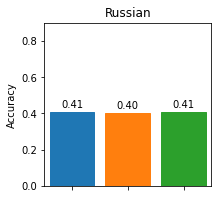

In [40]:
create_barchart("Russian")
plt.savefig("Figures/figure4-10.png", bbox_inches="tight")

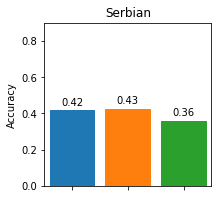

In [41]:
create_barchart("Serbian")
plt.savefig("Figures/figure4-11.png", bbox_inches="tight")

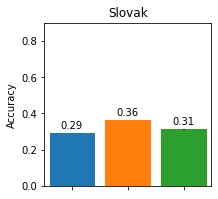

In [42]:
create_barchart("Slovak")
plt.savefig("Figures/figure4-12.png", bbox_inches="tight")

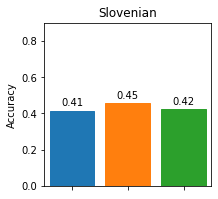

In [43]:
create_barchart("Slovenian")
plt.savefig("Figures/figure4-13.png", bbox_inches="tight")

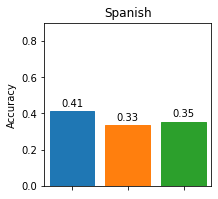

In [44]:
create_barchart("Spanish")
plt.savefig("Figures/figure4-14.png", bbox_inches="tight")

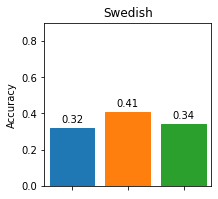

In [45]:
create_barchart("Swedish")
plt.savefig("Figures/figure4-15.png", bbox_inches="tight")

### Figure 5

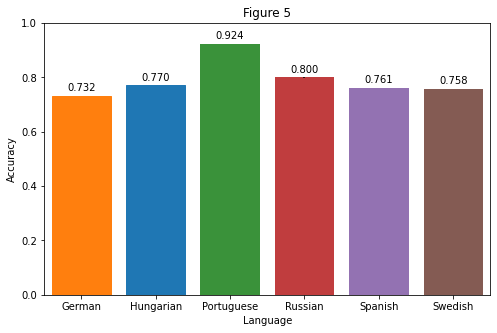

In [46]:
fig_data = pd.DataFrame({"Language": list(cluster_data.keys()), 
                     "Median": [x["Median"] for x in cluster_data.values()],
                     "99 Distance": [x["99 Distance"] for x in cluster_data.values()]})

plt.rcParams["figure.figsize"] = (8,5)

bp = sns.barplot(
    data=fig_data,
    x="Language",
    y="Median",
    yerr=fig_data["99 Distance"])

plt.ylim(0, 1)
bp.set_title("Figure 5")
bp.set(xlabel="Language", ylabel="Accuracy")

bp.patches[0].set_color("tab:orange")
bp.patches[1].set_color("tab:blue")

for bar in bp.patches:
    bp.annotate(format(bar.get_height(), '.3f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
                size=10, xytext=(0, 8),
                textcoords='offset points')

plt.savefig("Figures/figure5.png", bbox_inches="tight")

# Increase/Decrease

In [47]:
# Use the same data as Figure 3
# Remember that the data is ordered Pipeline 2, Pipeline 1, Pipeline 3
fig_data = build_fig3_data()

In [48]:
increased = []
decreased = []
for key, val in fig_data.items():
    medians = val["Medians"]
    if key == "English":
        continue
    if medians[1] < medians[2]:
        increased.append((key, medians[2] - medians[1]))
    else:
        decreased.append((key, medians[2] - medians[1]))

print("Increased between Pipeline 1 and Pipeline 3")
print(*increased, sep='\n')
print("Decreased between Pipeline 1 and Pipeline 3")
print(*decreased, sep='\n')

Increased between Pipeline 1 and Pipeline 3
('Bosnian', 0.013271292167222781)
('Bulgarian', 0.0021981981543026663)
('Croatian', 0.004600384537399971)
('German', 0.011051401701178243)
('Hungarian', 0.0016407575526895535)
('Polish', 0.007363821046500574)
('Portuguese', 0.01271990994649752)
('Russian', 0.02443288154260881)
('Slovak', 0.005109338576128941)
('Slovenian', 0.012392265352633491)
('Swedish', 0.015343834059811545)
Decreased between Pipeline 1 and Pipeline 3
('Albanian', -0.012241881871933424)
('Serbian', -0.1566260289494923)
('Spanish', -0.03108267555742361)


In [49]:
increased = []
decreased = []
for key, val in fig_data.items():
    medians = val["Medians"]
    if key == "English":
        continue
    if medians[1] < medians[0]:
        increased.append((key, medians[0] - medians[1]))
    else:
        decreased.append((key, medians[0] - medians[1]))

print("Increased between Pipeline 1 and Pipeline 2")
print(*increased, sep='\n')
print("Decreased between Pipeline 1 and Pipeline 2")
print(*decreased, sep='\n')

Increased between Pipeline 1 and Pipeline 2
('Albanian', 0.03456399475021665)
('Bosnian', 0.04359679633112967)
('Bulgarian', 0.017214984788738508)
('Croatian', 0.06859461546521928)
('German', 0.035946127819261986)
('Hungarian', 0.09609410602940616)
('Polish', 0.0343647748505993)
('Russian', 0.0012553290721923904)
('Slovak', 0.04814319167638392)
('Spanish', 0.2566228056526748)
Decreased between Pipeline 1 and Pipeline 2
('Portuguese', -0.013124766705963076)
('Serbian', -0.1432400641571605)
('Slovenian', -0.14556191374243055)
('Swedish', -0.042515722005163514)


In [50]:
increased = []
decreased = []
for key, val in fig_data.items():
    medians = val["Medians"]
    if key == "English":
        continue
    if medians[0] < medians[2]:
        increased.append((key, medians[2] - medians[0]))
    else:
        decreased.append((key, medians[2] - medians[0]))

print("Increased between Pipeline 2 and Pipeline 3")
print(*increased, sep='\n')
print("Decreased between Pipeline 2 and Pipeline 3")
print(*decreased, sep='\n')

Increased between Pipeline 2 and Pipeline 3
('Portuguese', 0.025844676652460596)
('Russian', 0.023177552470416418)
('Slovenian', 0.15795417909506404)
('Swedish', 0.05785955606497506)
Decreased between Pipeline 2 and Pipeline 3
('Albanian', -0.04680587662215008)
('Bosnian', -0.03032550416390689)
('Bulgarian', -0.015016786634435841)
('Croatian', -0.0639942309278193)
('German', -0.024894726118083743)
('Hungarian', -0.0944533484767166)
('Polish', -0.027000953804098726)
('Serbian', -0.013385964792331784)
('Slovak', -0.04303385310025498)
('Spanish', -0.2877054812100984)
